In [1]:
### Import Libraries

import tensorflow as tf

import os

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf

import cv2

2023-01-04 23:18:49.951018: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-04 23:18:53.349356: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-04 23:18:54.664553: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-04 23:18:54.664598: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [2]:
# Some basic parameters

inpDir = '../input' # location where input data is stored
outDir = '../output' # location to store outputs

dataDir = 'basic_operations'
resDir = '../resources' # location where the resources are
casDir = 'haarcascades'  # 
RANDOM_STATE = 24 # for initialization ----- REMEMBER: to remove at the time of promotion to production

np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results


# Set parameters for decoration of plots
params = {'legend.fontsize' : 'large',
          'figure.figsize'  : (15,12),
          'axes.labelsize'  : 'x-large',
          'axes.titlesize'  :'x-large',
          'xtick.labelsize' :'large',
          'ytick.labelsize' :'large',
         }


CMAP = 'jet'

LINE_THICK = 1

MARK_COLOR = (15, 82, 186)

plt.rcParams.update(params) # update rcParams

### Helper functions

#### Function to read an image

In [3]:
def fn_read_image(fileName):
  '''2
    Args
  '''
  imgPath=os.path.join(inpDir,dataDir,fileName)

  #Read image file
  im=cv2.imread(imgPath,cv2.IMREAD_COLOR)

  if im is None:
    print('Could not open or find the image',fileName)
    exit(0)
  else:
    #Convert to RGB image
    rgbIm=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    return im,rgbIm

#### Function to plot one image¶

In [4]:
#Showing this image

def fn_plot_one_img(im):
  '''2
  
  '''
  #Showing image
  plt.imshow(im) #Plotting the image
  plt.axis('off') #no axis to dispLay
  
  #plt.savefig

#### Function to plot many images

In [5]:
def fn_plot_images(im_lst):
  """
  
  """
  nRows=1
  nCols=len(im_lst)

  fig,axes=plt.subplots(nRows,nCols)

  for i in range(nCols):

    #Display image
    axes[i].imshow(im_lst[i]['img'],cmap=im_lst[i]['cmap'])

    #Setting title of individual plot
    axes[i].set_title(im_lst[i]['name'])

    #Remove axis tics from the plot
    axes[i].set_xticklabels([]);
    axes[i].set_yticklabels([]);
  #Optiize thfn_plot_imagese plot layout
  plt.tight_layout()

### Load Cascades

OpebCv provides a training method or pretrained models.

Cascase function


In [6]:
faceCascade = cv2.CascadeClassifier(os.path.join(resDir, 
                                                 casDir, 
                                                 'haarcascade_frontalface_default.xml'))

eyeCascade = cv2.CascadeClassifier(os.path.join(resDir,
                                                casDir,
                                                'haarcascade_eye.xml'))

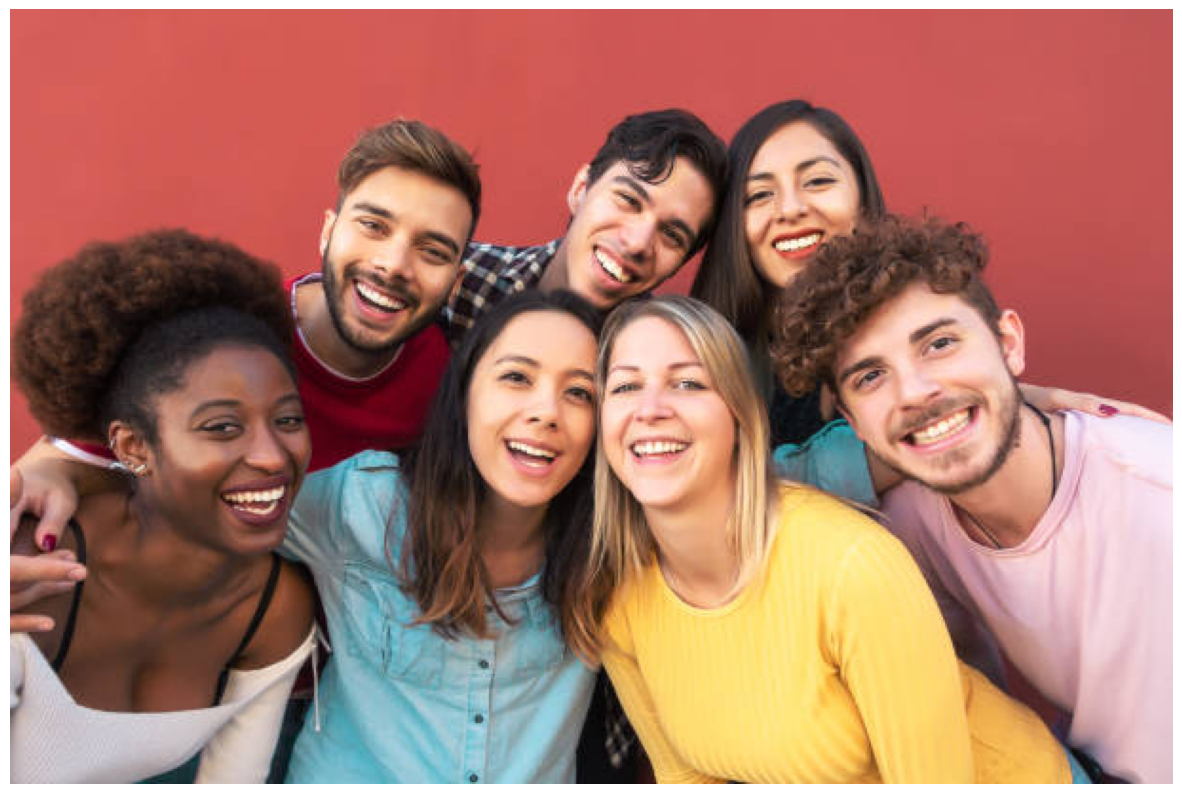

In [7]:
# which file to load
imgFileName = 'groupphoto.jpg'
2
# load the file and convert to RGB
srcImg , rgbImg = fn_read_image(imgFileName)

# Make a grey scale image
grayImg = cv2.cvtColor(srcImg, cv2.COLOR_BGR2GRAY)

# plotterd teh loaded image 
fn_plot_one_img(rgbImg)

### <u>Edge Features , Line Features , Center-Surround Features & Diagonal Features and how the pickup of detect the facial features<u> 

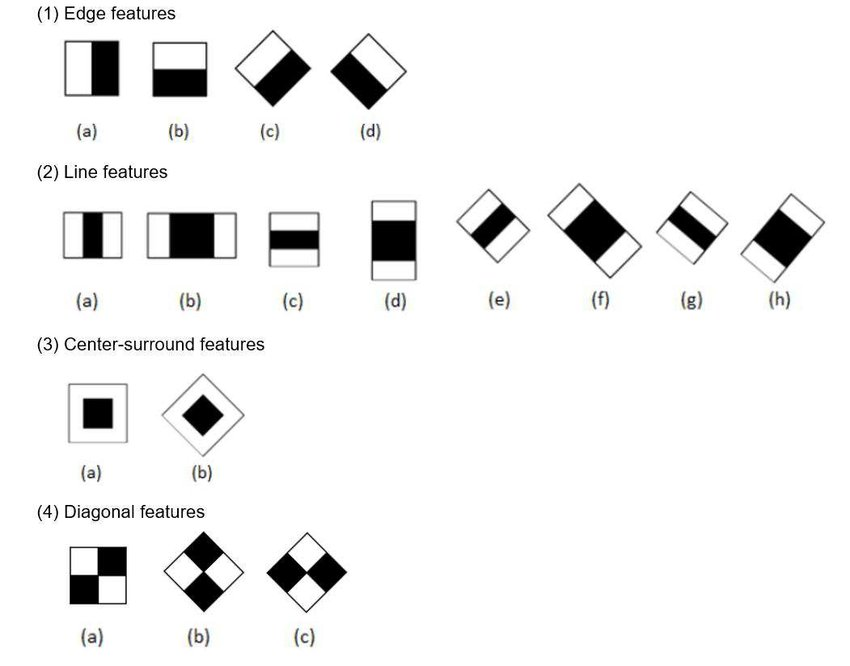

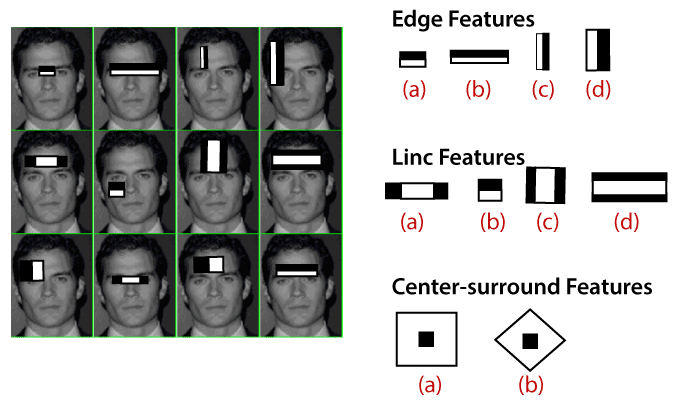

#### Image Resiziging through Image pyramid 

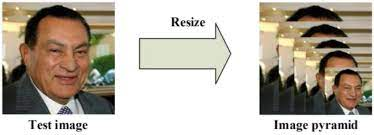

#### parameters for faceCascade.detectMultiScale

* image ->	Matrix of the type CV_8U containing an image where objects are detected.
* scaleFactor ->	Parameter specifying how much the image size is reduced at each image scale.
* minNeighbors ->	Parameter specifying how many neighbors each candidate rectangle should have to retain it.

In [8]:
faces = faceCascade.detectMultiScale(grayImg,  # greyscale image
                                     1.02,     # Scale
                                     10)        # minNeighbors

eyes = eyeCascade.detectMultiScale(grayImg,  # greyscale image
                                     1.03,     # Scale
                                     5)        # minNeighbors

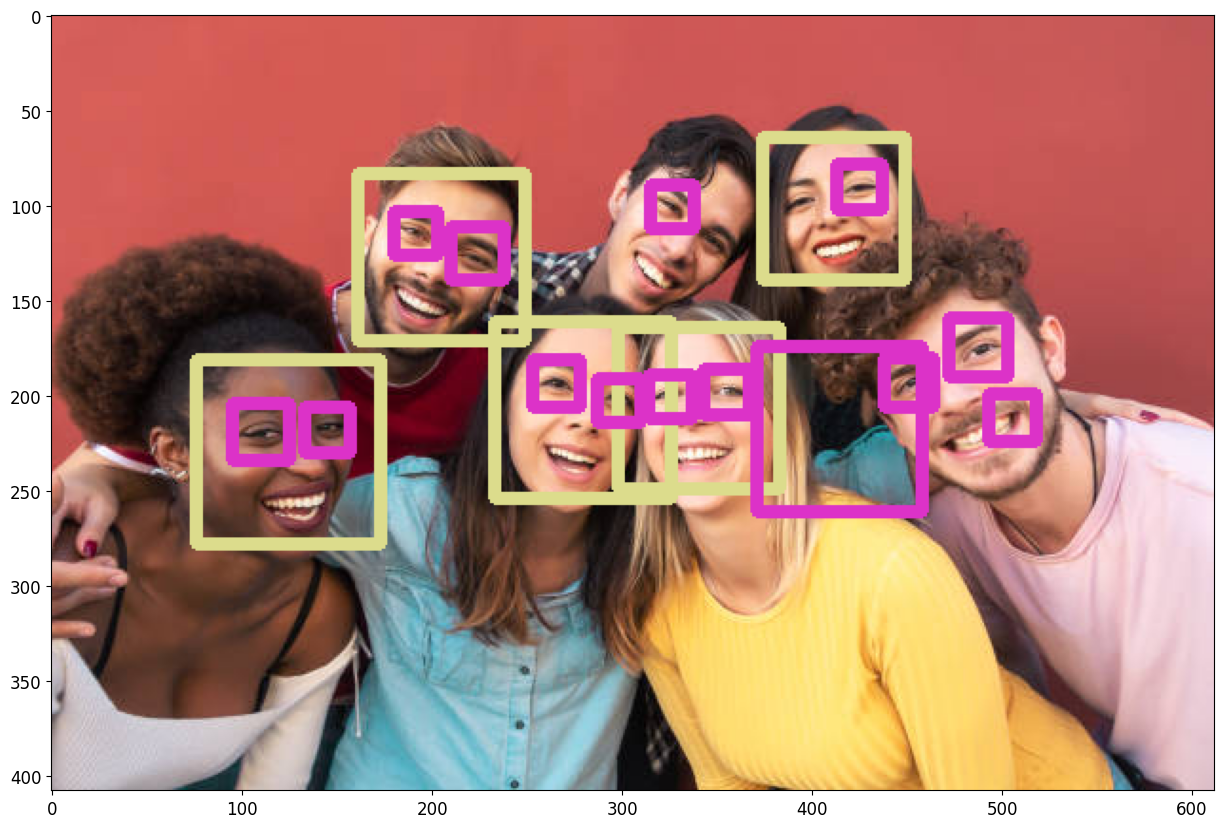

In [9]:
faceImg = rgbImg.copy()

for (x,y,w,h) in faces:
    cv2.rectangle(faceImg, (x,y), (x+w , y+h) ,(220,220,140) , 5)
    
for (x,y,w,h) in eyes:
    cv2.rectangle(faceImg, (x,y), (x+w , y+h) ,(220,50,200) , 5)
    2
plt.imshow(faceImg)

In [10]:
print("[INFO] Found {0} Faces!".format(len(faces)))
print("[INFO] Found {0} Eyes!".format(len(eyes)))

[INFO] Found 5 Faces!
[INFO] Found 14 Eyes!


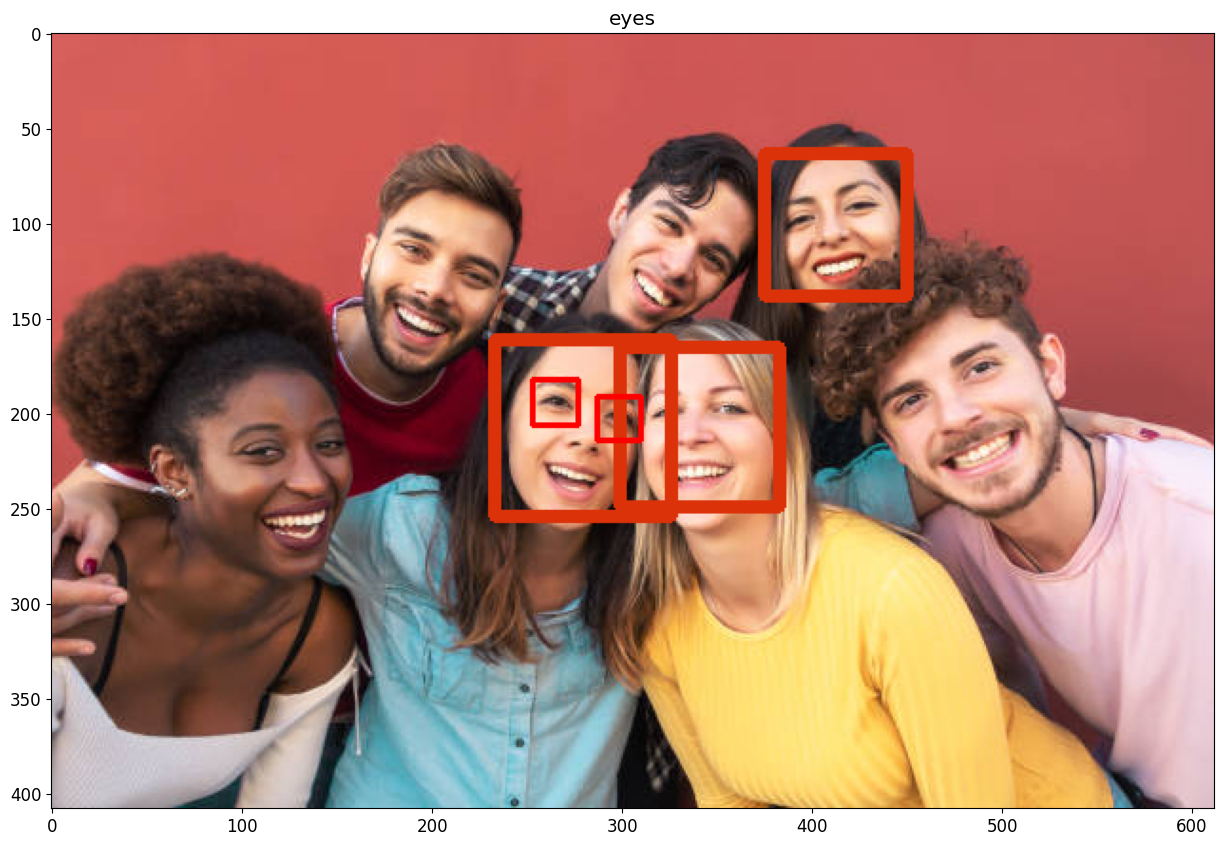

In [11]:
faces = faceCascade.detectMultiScale (grayImg, # grayscaled image
                                      1.09, # scale
                                      11)

eyeImg = rgbImg.copy()

for (x, y, w, h) in faces:
    cv2.rectangle(eyeImg, (x,y), (x+w, y+h), (220,50,10), 5)
    eyeGray = grayImg.copy()
    eyeGray = eyeGray[y: y+h, x: x+w] 
    eyes = eyeCascade.detectMultiScale (eyeGray, # grayscaled image
                                      1.06, # scale
                                      5)

for (ex, ey, ew, eh) in eyes:
    cv2. rectangle(eyeImg, (x + ex, y + ey), (x+ex+ew, y+ey+eh), (255,0,0), 2)
plt.imshow(eyeImg) 
plt.title('eyes');

## Eigen Faces

### Eigen Faces - An application of Principle Component Analysis (PCA) Fro Human Faces

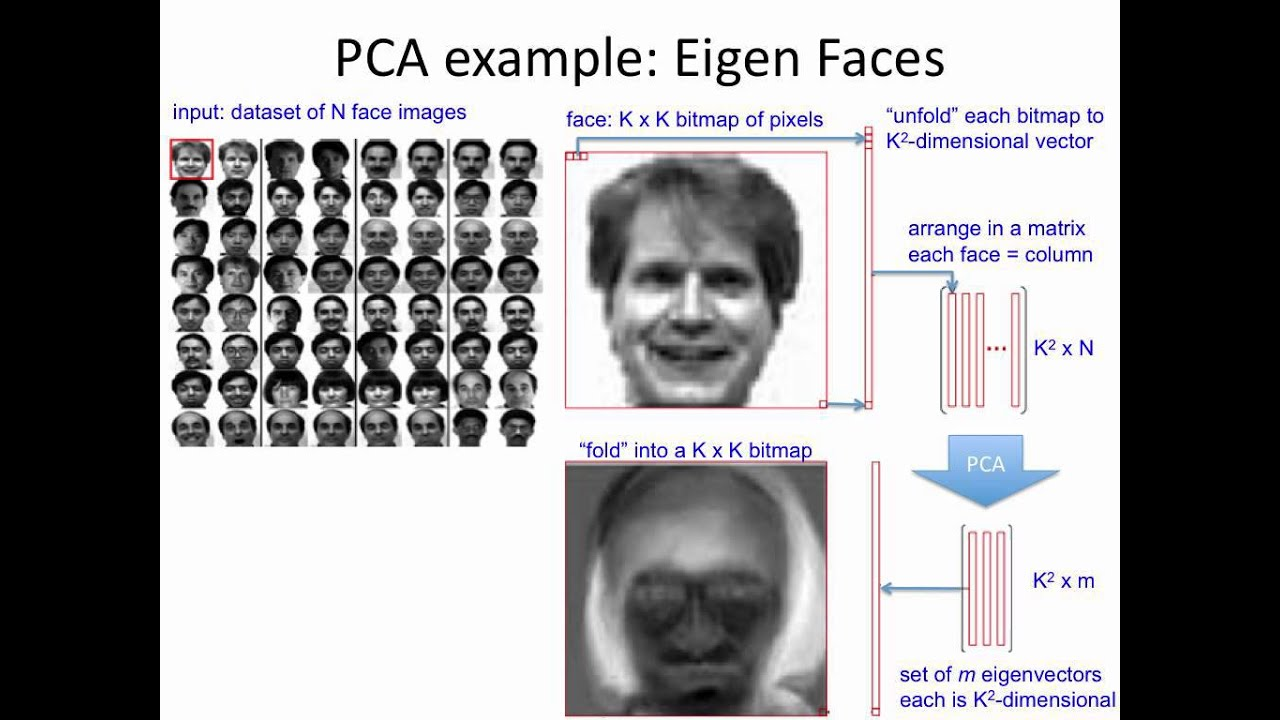